# Hepstat_Tutorial_Hypo_Cls
RooStats example: compute the upper limit using Hypothesis Test Inversion (CLs Limits)
The signal is a simple Gaussian and the background is a smoothly falling spectrum. 
We need to perform the hypothesis test for different parameter of interest points and compute the corresponding p-values.
Since we are interesting in computing a limit, the test null hypothesis, that we want to disprove, is the in this case the S+B model,
while the alternate hypothesis is the B only model. *It is important to remember this, when we construct the hypothesis test calculator*.
This is the opposite of the null hypothesis significance (p0) calculation.

 Objectives of this tutorial are the following:
 * Create the HypoTestInverter class and configure it
 * Compute the CLs upper limits using the asymptotic formula
 * Compute the CLs upper limits using the frequentist method (time consuming)


Based on the example [here](https://www.nikhef.nl/~vcroft/RooStats.html), and also [StandardHypoTestInvDemo.C](https://root.cern/doc/master/StandardHypoTestInvDemo_8C.html)


**Author:** Lailin XU  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 07, 2021 at 09:34 AM.</small></i>

In [1]:
import os, sys

Import the ROOT libraries

In [2]:
import ROOT as R
from math import pow, sqrt, fabs
R.gROOT.SetStyle("ATLAS")

Welcome to JupyROOT 6.22/06


Prepare the model
=======================
Signal mass point

In [3]:
mass = 125

Worksapce

In [4]:
wsfile = "test_hf_ws_{}.root".format(mass)
if not os.path.isfile(wsfile):
  print("Error! No ws files found: {}".format(wsfile)) 
  pyhist = "hepstat_tutorial_histfactory_hists.py"
  if os.path.isfile(pyhist):
    cmd = "python3 {0} {1]".format(pyhist, mass)
    os.system(cmd)

Open the workpace

In [5]:
tf = R.TFile.Open(wsfile, "READ")
w = tf.Get("myws")


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



data

In [6]:
data = w.obj("obsData")

The S+B model (Alternative hypo)

In [7]:
sbModel = w.obj("ModelConfig")
poi = sbModel.GetParametersOfInterest().first()
poi.setVal(1.)
poi.setRange(0, 20)
sbModel.SetSnapshot(R.RooArgSet(poi))

PDF

In [8]:
pdf = sbModel.GetPdf()

save snapshot before any fit has been done

In [9]:
params = pdf.getParameters(data)
snapshotName_init = "snapshot_paramsVals_initial"
w.saveSnapshot(snapshotName_init, params)

True

The B model (Null hypo)

In [10]:
bModel = sbModel.Clone()
bModel.SetName("B_only_model")
poi.setVal(0)
bModel.SetSnapshot(R.RooArgSet(poi))

w.Print()


RooWorkspace(myws) SR workspace contents

variables
---------
(Lumi,alpha_background_shape,alpha_bkg_norm_uncertainty,alpha_signal_norm_uncertainty,binWidth_obs_x_SR_0,binWidth_obs_x_SR_1,mu,nom_alpha_background_shape,nom_alpha_bkg_norm_uncertainty,nom_alpha_signal_norm_uncertainty,nominalLumi,obs_x_SR,weightVar)

p.d.f.s
-------
RooRealSumPdf::SR_model[ binWidth_obs_x_SR_0 * L_x_signal_SR_overallSyst_x_Exp + binWidth_obs_x_SR_1 * L_x_background_SR_overallSyst_x_HistSyst ] = 1.353
RooGaussian::alpha_background_shapeConstraint[ x=alpha_background_shape mean=nom_alpha_background_shape sigma=1 ] = 1
RooGaussian::alpha_bkg_norm_uncertaintyConstraint[ x=alpha_bkg_norm_uncertainty mean=nom_alpha_bkg_norm_uncertainty sigma=1 ] = 1
RooGaussian::alpha_signal_norm_uncertaintyConstraint[ x=alpha_signal_norm_uncertainty mean=nom_alpha_signal_norm_uncertainty sigma=1 ] = 1
RooGaussian::lumiConstraint[ x=Lumi mean=nominalLumi sigma=0.02 ] = 1
RooProdPdf::model_SR[ lumiConstraint * alpha_signal_norm

Asymptotic calculator
=======================
NOTE here `null` is the S+B model, and the alternative is the B model, the one we want to disapprove

See more details about [RooStats::AsymptoticCalculator](https://root.cern/doc/v608/classRooStats_1_1AsymptoticCalculator.html)
The calculator provides methods to produce the Asimov dataset, i.e a dataset generated where the observade values are equal to the expected ones. The Asimov data set is then used to compute the observed asymptotic p-value for the alternate hypothesis and the asympotic expected p-values.

The asymptotic formulae are valid only for one POI (parameter of interest). So the calculator works only for one-dimesional (one POI) model. If more than one POI exists consider as POI only the first one is used.

In [11]:
ac = R.RooStats.AsymptoticCalculator(data, bModel, sbModel)

[#0] PROGRESS:Eval -- AsymptoticCalculator::Initialize....
[#0] PROGRESS:Eval -- AsymptoticCalculator::Initialize - Find  best unconditional NLL on observed data
AsymptoticCalculator::EvaluateNLL  ........ using Minuit / Migrad with strategy  1 and tolerance 1
 **********
 **    1 **SET PRINT           0
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alpha_background_shape   0.00000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
     2 alpha_bkg_norm_uncertainty   0.00000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
     3 alpha_signal_norm_uncertainty   0.00000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
     4 mu           0.00000e+00  2.00000e+00    0.00000e+00  2.00000e+01
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE4 IS AT ITS LOWER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE4 BROUG

Do one-sided for upper limits

In [12]:
ac.SetOneSided(True)

HypoTestInverter

In [13]:
calc = R.RooStats.HypoTestInverter(ac)

[#1] INFO:InputArguments -- HypoTestInverter ---- Input models: 
		 using as S+B (null) model     : ModelConfig
		 using as B (alternate) model  : B_only_model



For 95% upper limits

In [14]:
calc.SetConfidenceLevel(0.95)

for CLs

In [15]:
calc.UseCLs(True)
calc.SetVerbose(False)

Get the hypo test result

In [16]:
r = calc.GetInterval()

[#1] INFO:Eval -- HypoTestInverter::GetInterval - run an automatic scan
[#1] INFO:ObjectHandling -- RooWorkspace::saveSnaphot(myws) replacing previous snapshot with name ModelConfig__snapshot

[#1] INFO:Eval -- AsymptoticCalculator::GetHypoTest: - perform  an hypothesis test for  POI ( mu ) = 20
[#0] PROGRESS:Eval -- AsymptoticCalculator::GetHypoTest -  Find  best conditional NLL on OBSERVED data set ..... 
AsymptoticCalculator::EvaluateNLL  ........ using Minuit / Migrad with strategy  1 and tolerance 1
 **********
 **   13 **SET PRINT           0
 **********
 **********
 **   14 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alpha_background_shape   1.12862e-01  8.77605e-01   -5.00000e+00  5.00000e+00
     2 alpha_bkg_norm_uncertainty  -1.50656e-01  7.21604e-01   -5.00000e+00  5.00000e+00
     3 alpha_signal_norm_uncertainty   1.53993e-03  9.93350e-01   -5.00000e+00  5.00000e+00
 **********
 **   15 **SET ERR         0.

compute expected limit

In [17]:
med = r.GetExpectedUpperLimit(0)
m2 = r.GetExpectedUpperLimit(-2)
m1 = r.GetExpectedUpperLimit(-1)
p1 = r.GetExpectedUpperLimit(1)
p2 = r.GetExpectedUpperLimit(2)
print("Expected upper limits from AsymptoticCalculator: " )
print(" expected limit (median) " , med)
print(" expected limit (-2 sig) " , m2)
print(" expected limit (-1 sig) " , m1)
print(" expected limit (+1 sig) " , p1)
print(" expected limit (+2 sig) " , p2)

Expected upper limits from AsymptoticCalculator: 
 expected limit (median)  8.2577933652843
 expected limit (-2 sig)  0.0
 expected limit (-1 sig)  0.0
 expected limit (+1 sig)  14.576014349670505
 expected limit (+2 sig)  19.253967446022777


Plot the distributions of the test statistic

Info in <TCanvas::Print>: png file test_cls_asym_1.png has been created
Info in <TCanvas::SaveAs>: ROOT file test_cls_asym_1.root has been created


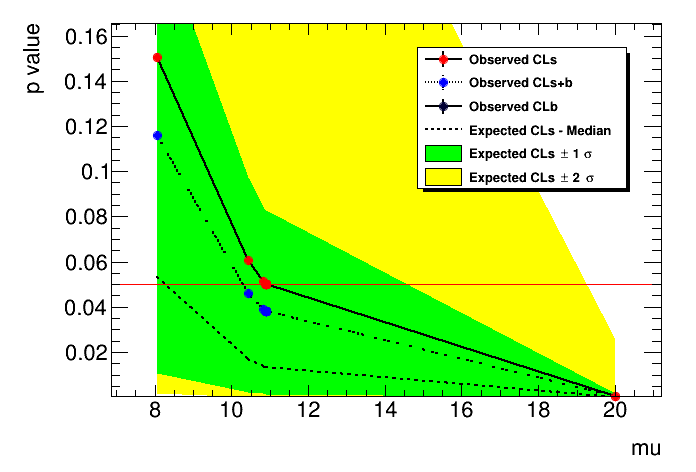

In [18]:
plot = R.RooStats.HypoTestInverterPlot("HTI_Result_Plot","HypoTest Scan Result",r)
c = R.TCanvas("HypoTestInverter Scan: Asymptotic")
c.SetLogy(False)
plot.Draw("CLb 2CL")
c.Draw()

c.SaveAs("test_cls_asym_1.png")
c.SaveAs("test_cls_asym_1.root")

The frequentist appproach
=======================
[RooStats::FrequentistCalculator](https://root.cern/doc/master/classRooStats_1_1FrequentistCalculator.html)
Hypothesis Test Calculator using a full frequentist procedure for sampling the test statistic distribution. The nuisance parameters are fixed to their MLEs. The use of ToyMCSampler as the TestStatSampler is assumed.

In [19]:
w.loadSnapshot(snapshotName_init)
poi.Print()
fc = R.RooStats.FrequentistCalculator(data, bModel, sbModel)

RooRealVar::mu = 1  L(0 - 20) 


Test statistics: profile liekelihood

In [20]:
profll = R.RooStats.ProfileLikelihoodTestStat(sbModel.GetPdf())
profll.SetOneSided(True)

Need to throw toys

In [21]:
toymcs = fc.GetTestStatSampler()
if not sbModel.GetPdf().canBeExtended():
    toymcs.SetNEventsPerToy(1)
    print('\nAdjusting for non-extended formalism\n')

Set the test stat

In [22]:
toymcs.SetTestStatistic(profll)

null toys, alt toys

In [23]:
fc.SetToys(2500,1000)

Use multicore to speed up. Enable proof

In [24]:
mNWorkers=4
pc=R.RooStats.ProofConfig(w, mNWorkers, "", R.kFALSE)
toymcs.SetProofConfig(pc)    

HypoTestInverter

In [25]:
calc = R.RooStats.HypoTestInverter(fc)
calc.SetConfidenceLevel(0.95)

calc.UseCLs(True)
calc.SetVerbose(False)

[#1] INFO:InputArguments -- HypoTestInverter ---- Input models: 
		 using as S+B (null) model     : ModelConfig
		 using as B (alternate) model  : B_only_model



Set scan points and range

In [26]:
npoints = 10
poimin = poi.getMin()
poimax = poi.getMax()
calc.SetFixedScan(npoints,poimin,poimax)

Get the hypo test result
WARNING: this step can be a bit time consuming, as for each scan, toys need to be run to calculate the p-value

In [27]:
r = calc.GetInterval()

[#1] INFO:Eval -- HypoTestInverter::GetInterval - run a fixed scan
[#1] INFO:ObjectHandling -- RooWorkspace::saveSnaphot(myws) replacing previous snapshot with name ModelConfig__snapshot

=== Using the following for ModelConfig ===
Observables:             RooArgSet:: = (obs_x_SR)
Parameters of Interest:  RooArgSet:: = (mu)
Nuisance Parameters:     RooArgSet:: = (alpha_background_shape,alpha_bkg_norm_uncertainty,alpha_signal_norm_uncertainty)
Global Observables:      RooArgSet:: = (nom_alpha_signal_norm_uncertainty,nom_alpha_bkg_norm_uncertainty,nom_alpha_background_shape)
PDF:                     RooProdPdf::model_SR[ lumiConstraint * alpha_signal_norm_uncertaintyConstraint * alpha_bkg_norm_uncertaintyConstraint * alpha_background_shapeConstraint * SR_model(obs_x_SR) ] = 0.024015/1
Snapshot:                
  1) 0x7afd560 RooRealVar:: mu = 0  L(0 - 20)  "mu"


=== Using the following for B_only_model ===
Observables:             RooArgSet:: = (obs_x_SR)
Parameters of Interest:  RooArg

Opening connections to workers: OK (4 workers)                 
Setting up worker servers: OK (4 workers)                 
Info in <TProofLite::SetQueryRunning>: starting query: 1
Info in <TProofQueryResult::SetRunning>: nwrks: 4
[TProof::Progress] Total 4 events	|====================| 100.00 % [1.5 evts/s, time left: 0.0 s]
 Query processing time: 2.7 s
Lite-0: all output objects have been merged                                                         
Info in <TProofLite::SetQueryRunning>: starting query: 2
Info in <TProofQueryResult::SetRunning>: nwrks: 4
[TProof::Progress] Total 4 events	|====================| 100.00 % [3.4 evts/s, time left: 0.0 s]
 Query processing time: 1.2 s
Lite-0: all output objects have been merged                                                         
Info in <TProofLite::SetQueryRunning>: starting query: 3
Info in <TProofQueryResult::SetRunning>: nwrks: 4
[TProof::Progress] Total 4 events	|====================| 100.00 % [1.2 evts/s, time left: 0.0 s]
 Qu

compute expected limit

In [28]:
med = r.GetExpectedUpperLimit(0)
m2 = r.GetExpectedUpperLimit(-2)
m1 = r.GetExpectedUpperLimit(-1)
p1 = r.GetExpectedUpperLimit(1)
p2 = r.GetExpectedUpperLimit(2)
print("Expected upper limits from FrequentistCalculator: " )
print(" expected limit (median) " , med)
print(" expected limit (-2 sig) " , m2)
print(" expected limit (-1 sig) " , m1)
print(" expected limit (+1 sig) " , p1)
print(" expected limit (+2 sig) " , p2)

Expected upper limits from FrequentistCalculator: 
 expected limit (median)  8.434725918049153
 expected limit (-2 sig)  4.436072813408247
 expected limit (-1 sig)  6.190394749078172
 expected limit (+1 sig)  11.299277856343107
 expected limit (+2 sig)  16.19764404861159


Plot the distributions of the test statistic

Info in <TCanvas::Print>: png file test_cls_frq_1.png has been created
Info in <TCanvas::SaveAs>: ROOT file test_cls_frq_1.root has been created


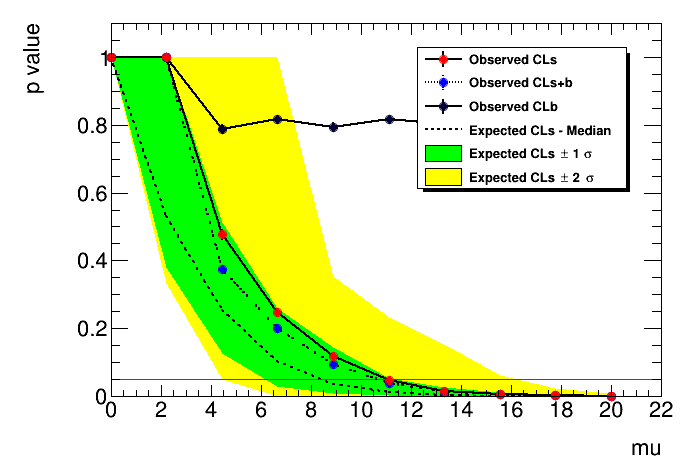

In [29]:
plot = R.RooStats.HypoTestInverterPlot("HTI_Result_Plot","HypoTest Scan Result",r)
c = R.TCanvas("HypoTestInverter Scan: Frequentist")
c.SetLogy(False)
plot.Draw("CLb 2CL")
c.Draw()

c.SaveAs("test_cls_frq_1.png")
c.SaveAs("test_cls_frq_1.root")

Draw all canvases 

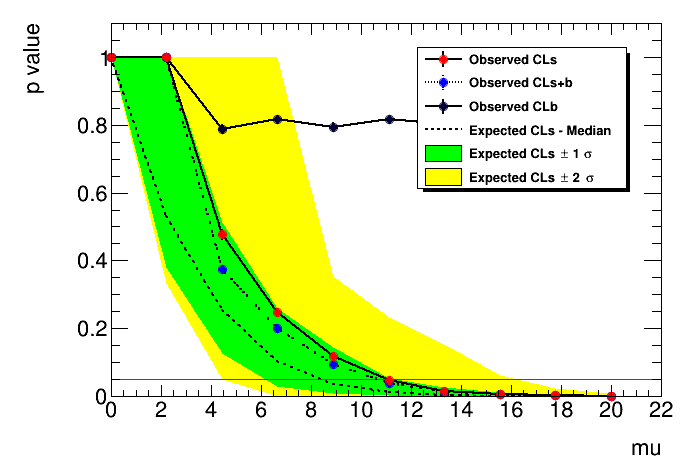

In [30]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()